# Unsupervised learning / Clustering

## K-mean clustering

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=2000, centers = 3, cluster_std=[1.0, 2.5, 0.5])
X, y

(array([[ 9.09071898, -3.56146752],
        [ 7.22636721, -8.17948101],
        [ 8.48778915, -3.1453236 ],
        ...,
        [ 6.50076238,  5.75539381],
        [ 4.95922275, -4.2234039 ],
        [ 6.80981271,  3.67218201]]), array([2, 1, 2, ..., 0, 1, 0]))

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

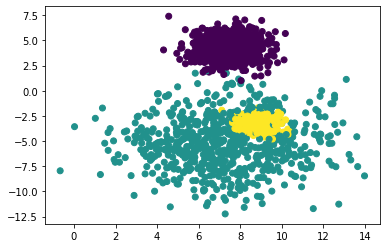

In [ ]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y)

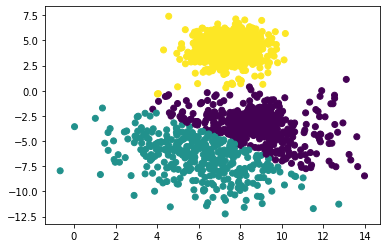

In [ ]:
from sklearn.cluster import KMeans

y_predicted = KMeans(n_clusters=3, init="random",max_iter=100, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predicted)

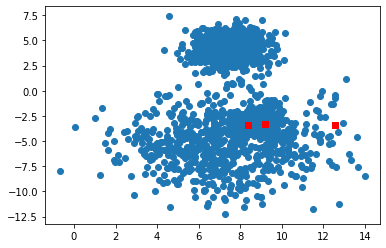

In [ ]:
init = X[0:3,:]

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(init[:, 0], init[:, 1], c="r", marker="s")

[[ 7.01339729 -1.23505022]
 [ 9.10610375 -1.33238819]
 [11.94512249 -4.93186654]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


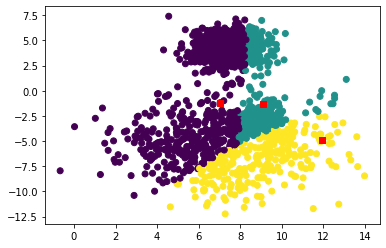

In [ ]:
kmeans = KMeans(n_clusters=3, init=init ,max_iter=1, n_init=10)
kmeans.fit(X)
init = kmeans.cluster_centers_
print(init)
y_predicted = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_predicted)
plt.scatter(init[:, 0], init[:, 1], c="r", marker="s")

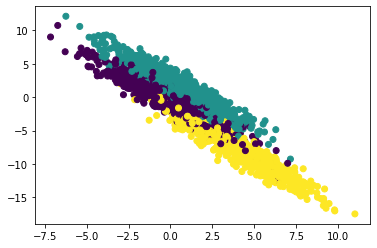

In [ ]:
# Lets make it hard for kmeans
import numpy as np
X, y = make_blobs(n_samples=2000, centers = 3, cluster_std=[3, 3, 3])
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)

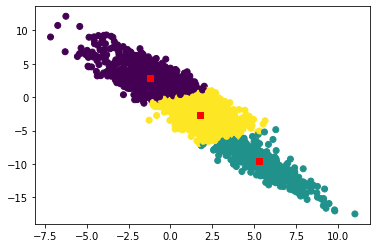

In [ ]:
kmeans = KMeans(n_clusters=3 ,max_iter=100, n_init=10)
kmeans.fit(X_aniso)
clust = kmeans.cluster_centers_
y_predicted = kmeans.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_predicted)
plt.scatter(clust[:, 0], clust[:, 1], c="r", marker="s")

## The Expectation maximization algorithm

63448.14901360903


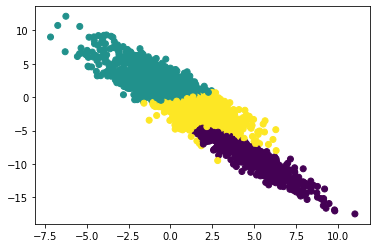

In [ ]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components=3)
em.fit(X_aniso)
y_predicted = em.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_predicted)
print(em.bic(X))

## PCA

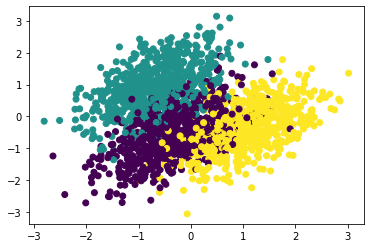

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)

X_pca = pca.fit_transform(X_aniso)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)


In [ ]:
pca.explained_variance_

array([34.53609447,  0.9606601 ])

In [ ]:
pca.explained_variance_ratio_

array([0.97293668, 0.02706332])

In [ ]:
pca.components_

array([[ 0.46664795, -0.88444315],
       [ 0.88444315,  0.46664795]])

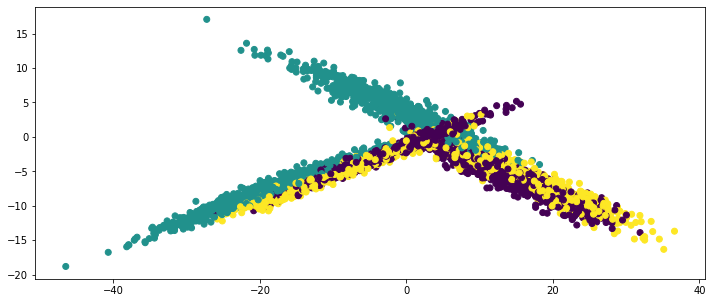

In [ ]:
X, y = make_blobs(n_samples=2000, centers = 3, cluster_std=[3, 3, 3])
transformation1 = np.array([[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
transformation2 = np.array([[-0.40887718, -0.65253229], [ -0.60834549, -0.63667341]])
X_aniso1 = np.dot(X, transformation1)
X_aniso1[:,0] *= 3
X_aniso2 = np.dot(X, transformation2)
X_aniso2[:,0] *= 3

X_full = np.concatenate((X_aniso1, X_aniso2), 0)
y_full = np.concatenate((y, y), 0)
plt.figure(figsize=(12, 5))
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full)

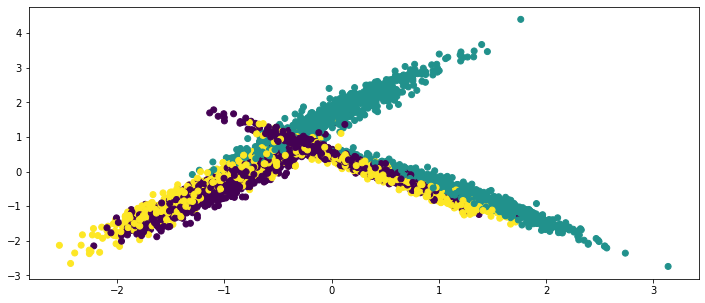

In [ ]:
pca = PCA(n_components=2, whiten=True)
from sklearn.decomposition import FastICA

X_pca = pca.fit_transform(X_full)
plt.figure(figsize=(12, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_full)

## ICA

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


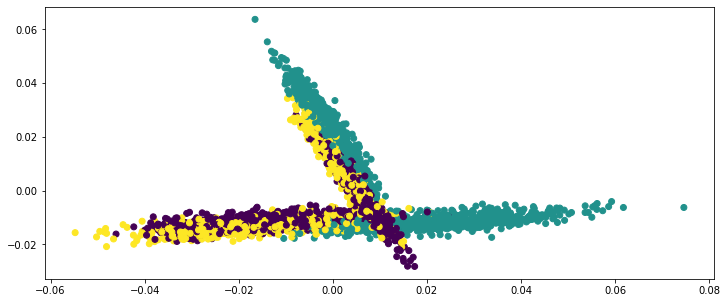

In [ ]:
from sklearn.decomposition import FastICA
ica = FastICA(2, max_iter=1000,)

X_ica = ica.fit_transform(X_full)
plt.figure(figsize=(12, 5))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_full)

In [ ]:
np.corrcoef(X_ica, rowvar=False)

array([[ 1.00000000e+00, -3.05311332e-16],
       [-3.05311332e-16,  1.00000000e+00]])